<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/study/sklearn/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **랜덤 포레스트**

### (1) 랜덤 포레스트란
- 배깅 방식
- 랜덤 포레스트의 기반 알고리즘은 결정 트리
    - 랜덤 포레스트 뿐 아니라 부스팅 기반의 다양한 앙상블 알고리즘 역시 대부분 결정 트리를 기반으로 채택

### (2) 하이퍼 파라미터
- n_estimators
- max_features
- max_depth, min_samples_leaf

In [1]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.956140350877193


GridSearchCV 하이퍼 파라미터 튜닝

In [6]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20],
}

clf = RandomForestClassifier(random_state=0, n_jobs=-1) # n_jobs=-1 : 모든 CPU 코어를 이용해 학습 가능
grid_cv = GridSearchCV(clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [7]:
print(grid_cv.best_params_, grid_cv.best_score_)

{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100} 0.9450691707241672


In [10]:
clf1 = RandomForestClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=100, random_state=0)
clf1.fit(X_train, y_train)
pred = clf1.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.9385964912280702


(30,)


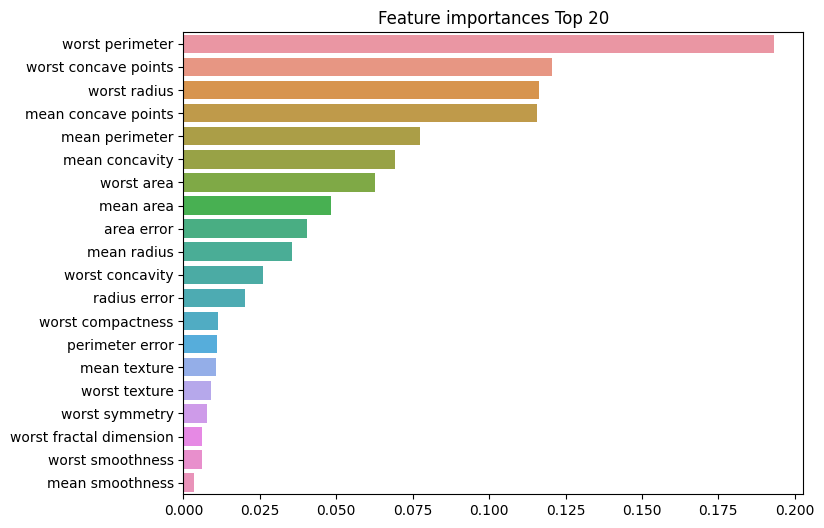

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

clf_importances_values = clf1.feature_importances_
print(clf_importances_values.shape)
clf_importances = pd.Series(clf_importances_values, index=cancer.feature_names)
clf_top20 = clf_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=clf_top20, y=clf_top20.index)
plt.show()